# Face Detection In Python Using OpenCV

There are various methods used to classify the faces in machine learning. But today we will be using two different classifiers to detect the faces present in the image. In this module, we will be using two face classifiers 1. HAAR Cascade Classifier and 2. LBP Cascade Classifier.

##  Theory

A computer program that decides whether an image is a positive image (face image) or a negative image (non-face image) is called a classifier. A classifier is trained on hundreds of thousands of face and non-face images to learn to classify a new image as the face or non-face image correctly. `OpenCV` provides us with two pre-trained (already trained and ready to be used for detection) classifiers:
 
1. Haar Classifier
2. LBP Classifier



### Dependencies

1. [OpenCV 3.2.0](http://opencv.org/releases.html) should be installed.
2. [Python v3.5](https://www.python.org/downloads/) should be installed.
3. (Optional) [Matplotlib 2.0](https://matplotlib.org/) should be installed if you want to see organized results like I have shown in this tutorial.

**Note:** If you don't want to install [Matplotlib 2.0](https://matplotlib.org/) then replace matplotlib code with [OpenCV 3.2.0](http://opencv.org/releases.html) code as below.

Instead of :

```
plt.imshow(gray_img, cmap='gray')
```

you can use :

```
cv2.imshow('Test Imag', gray_img)
cv2.waitKey(0)
cv2.destroyAllWindows()
```

* **`plt.imshow(img, color_map)`** is a matploblib function used to display image. It takes two arguments, first one is image you want to display and the second is color map (gray, RGB) in which image is in.
 
* **`cv2.imshow(window_name, image)`** is a cv2 function used to display image. It also takes two arguments, the first one is the name of the window that will pop up to display the image and the second one is the image you want to display.
* **`cv2.waitKey()`** is a keyboard binding function. Its argument is the time in milliseconds. The function waits for specified milliseconds for any keyboard event. If you press any key in that time, the program continues. If 0 is passed, it waits indefinitely for a keystroke. It can also be set to detect specific keystrokes like, if key a is pressed etc.
* **`cv2.destroyAllWindows()`** simply destroys all the windows we created using `cv2.imshow(window_name, image)`
 
Do keep these functions in mind, as we will be using them in code.


### Redirecting and Importing required Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
import os
os.chdir("/content/drive/My Drive/Colab Notebooks/faceDetection")

In [3]:
%cd data/

/content/drive/My Drive/Colab Notebooks/faceDetection/data


In [4]:
!ls

haarcascade_frontalface_alt.xml  test1.jpg   test3.jpg	test5.jpg
lbpcascade_frontalface.xml	 test2.jpeg  test4.jpg	test6.jpg


Let's import the required libraries first. As names of libraries are self-descriptive so I am sure you will understand them. 

In [5]:
#import required libraries 
#import OpenCV library
import cv2
#import matplotlib library
import matplotlib.pyplot as plt
#importing time library for speed comparisons of both classifiers
import time 
%matplotlib inline

%pylab inline
import matplotlib.image as mpimg

Populating the interactive namespace from numpy and matplotlib


When you load an image using OpenCV it loads that image into BGR color space by default. To show the colored image using `matplotlib` we have to convert it to RGB space. Following is a helper function to do exactly that. 

In [6]:
def convertToRGB(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

**`cv2.cvtColor`** is an OpenCV function to convert images to different color spaces. It takes an image to convert and a color space code (like cv2.COLOR_BGR2RGB) to convert image to and returns the converted image. 

Now that we are all setup, let's start coding our first face detector `Haar`. 

## Code - Haar Cascade Classifier

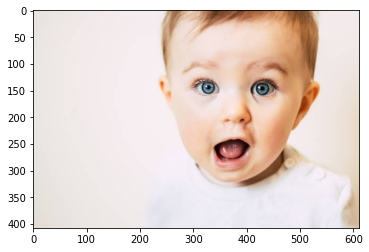

In [7]:
# Let's have a look at the original image.

orig_img = mpimg.imread('test1.jpg')
imgplot = plt.imshow(orig_img)
plt.show()


In [8]:
#convert the test image to gray image as opencv face detector expects gray images
gray_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2GRAY)

Now let's display our loaded image. To display our image, I am going to use **plt.imshow(img, cmap)** function of `matplotlib`. 

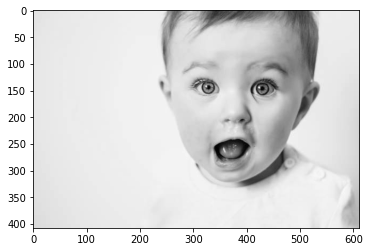

In [9]:
#if you have matplotlib installed then 
plt.imshow(gray_img, cmap='gray')

# or display the gray image using OpenCV
# cv2.imshow('Test Imag', gray_img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

It looks beautiful, does'nt it? Now let's detect face but before we can do face detection we have to load our Haar cascade classifier. OpenCV provides us with a class **[`cv2.CascadeClassifier`](http://docs.opencv.org/2.4.13.2/modules/objdetect/doc/cascade_classification.html#cascadeclassifier)** which takes input the training file of the classifier (Haar/LBP) we want to load and loads it for us. It's that easy! 

As we want to load our favorite Haar classifier so XML training files for Haar cascade is given in the folder.
Let's load up our classifier. 

In [10]:
!ls


haarcascade_frontalface_alt.xml  test1.jpg   test3.jpg	test5.jpg
lbpcascade_frontalface.xml	 test2.jpeg  test4.jpg	test6.jpg


In [11]:
#load cascade classifier training file for haarcascade
haar_face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')

In [12]:
#let's detect multiscale (some images may be closer to camera than others) images
faces = haar_face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5);

#print the number of faces found
print('Faces found: ', len(faces))

Faces found:  1


Woohoo! We have detected the face.
 
Next, let's loop over the list of faces (rectangles) it returned and draw those rectangles using the built-in OpenCV **`rectangle`** function on our original colored image to see if it detected the right faces.
 

In [13]:
#go over list of faces and draw them as rectangles on original colored img
for (x, y, w, h) in faces:
    cv2.rectangle(orig_img, (x, y), (x+w, y+h), (0, 255, 0), 2)

Display the original image to see rectangles drawn and verify that detected faces are really faces and not false positives. 

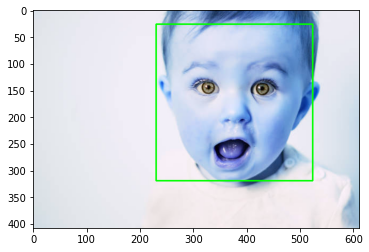

In [14]:
#conver image to RGB and show image
plt.imshow(convertToRGB(orig_img))

We did it! But we need to try it on other test images we have to used the same code again and again so why not group our code into a function so that it is reusable? 

### Grouping Code into a Function

It would be easy and reusable if we grouped our face detection code into a function so let's make a function out of our code.

In [15]:
def detect_faces(f_cascade, colored_img, scaleFactor = 1.1):
    #just making a copy of image passed, so that passed image is not changed
    img_copy = colored_img.copy()
    
    #convert the test image to gray image as opencv face detector expects gray images
    gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
    
    #let's detect multiscale (some images may be closer to camera than others) images
    faces = f_cascade.detectMultiScale(gray, scaleFactor=scaleFactor, minNeighbors=5);
    
    #go over list of faces and draw them as rectangles on original colored img
    for (x, y, w, h) in faces:
        cv2.rectangle(img_copy, (x, y), (x+w, y+h), (0, 255, 0), 2)
        
    return img_copy

Now let's try this function on another test image. 

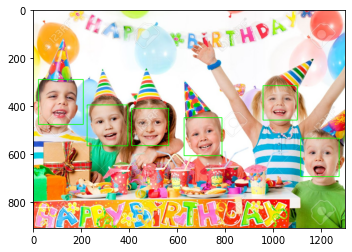

In [16]:
#load another image
test2 = cv2.imread('test3.jpg')

#call our function to detect faces
faces_detected_img = detect_faces(haar_face_cascade, test2)

#conver image to RGB and show image
plt.imshow(convertToRGB(faces_detected_img))

Pretty impressive.. all the faces have been detected.

### Dealing with false positives 

Let's try our face detector on another test image. 

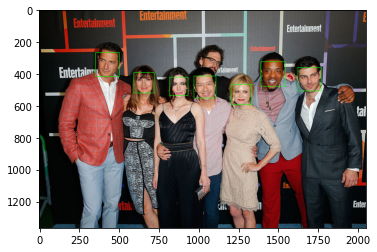

In [17]:
#load another image
test2 = cv2.imread('test4.jpg')

#call our function to detect faces
faces_detected_img = detect_faces(haar_face_cascade, test2)

#conver image to RGB and show image
plt.imshow(convertToRGB(faces_detected_img))

If you get any false positive image you have to tune these parameters according to information you have about your data.

## Code - LBP Cascade Classifier

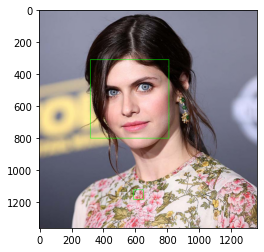

In [18]:
#load cascade classifier training file for lbpcascade
lbp_face_cascade = cv2.CascadeClassifier('lbpcascade_frontalface.xml')

#load test image
test2 = cv2.imread('test2.jpeg')
#call our function to detect faces
faces_detected_img = detect_faces(lbp_face_cascade, test2)

#conver image to RGB and show image
plt.imshow(convertToRGB(faces_detected_img))

So the code is exactly the same, I load up our `CascadeClassifier` this time with **`LBP training file`**. I read a test image and call our **detect_faces** function which returns an image with faces drawn on it. Then I display the image.
 
Let's try it on another test image. 


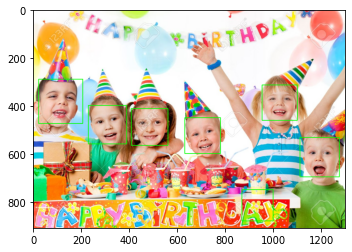

In [19]:
#load test image
test2 = cv2.imread('test3.jpg')
#call our function to detect faces
faces_detected_img = detect_faces(lbp_face_cascade, test2)

#conver image to RGB and show image
plt.imshow(convertToRGB(faces_detected_img))

Woohoo! It works on our test image too.

## 3. Haar and LBP Results Analysis

Let's do it then! We will run both `Haar` and `LBP` on **two test images to see accuracy and time delay of each classifier**.

In [20]:
#load cascade classifier training file for haarcascade
haar_face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')
#load cascade classifier training file for lbpcascade
lbp_face_cascade = cv2.CascadeClassifier('lbpcascade_frontalface.xml')

#load test image1
test1 = cv2.imread('test5.jpg')
#load test image2
test2 = cv2.imread('test6.jpg')

As you can see, I have loaded both **Haar** and **LBP** classifiers and two test images **test1** and **test2**.

### Test-1

Let's first try both classifiers on test1 image.

In [21]:
#------------HAARcascade Classifier-----------
#note time before detection
t1 = time.time()

#call our function to detect faces
haar_detected_img = detect_faces(haar_face_cascade, test1)

#note time after detection
t2 = time.time()
#calculate time difference
dt1 = t2 - t1
#print the time differene

In [22]:
#------------LBP-----------
#note time before detection
t1 = time.time()

lbp_detected_img = detect_faces(lbp_face_cascade, test1)

#note time after detection
t2 = time.time()
#calculate time difference
dt2 = t2 - t1
#print the time differene


Let's see the time required for the classifiers to detect the faces onto the image.

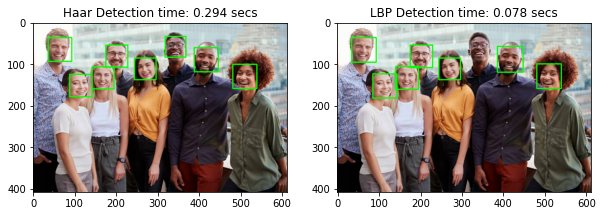

In [23]:

#create a figure of 2 plots (one for Haar and one for LBP)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

#show Haar image
ax1.set_title('Haar Detection time: ' + str(round(dt1, 3)) + ' secs')
ax1.imshow(convertToRGB(haar_detected_img))

#show LBP image
ax2.set_title('LBP Detection time: ' + str(round(dt2, 3)) + ' secs')
ax2.imshow(convertToRGB(lbp_detected_img))

#show images
# plt.imshow(faces_detected_img)

### Result : 
- **Accuracy:** Both `Haar` and `LBP` detected faces successfully.
- **Time Required:** `LBP` was significantly faster than `Haar`.

### Test-2 

Let's see the results for test2 image. The code is exactly same as for test1.

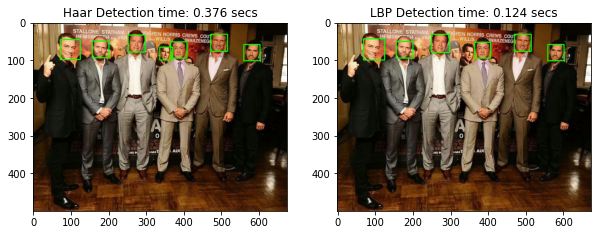

In [24]:
#------------HAARcascade Classifier-----------
#note time before detection
t1 = time.time()

#call our function to detect faces
haar_detected_img = detect_faces(haar_face_cascade, test2)

#note time after detection
t2 = time.time()
#calculate time difference
dt1 = t2 - t1
#print the time differene

#------------LBP-----------
#note time before detection
t1 = time.time()

lbp_detected_img = detect_faces(lbp_face_cascade, test2)

#note time after detection
t2 = time.time()
#calculate time difference
dt2 = t2 - t1
#print the time differene

#----------Let's do some fancy drawing-------------
#create a figure of 2 plots (one for Haar and one for LBP)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

#show Haar image
ax1.set_title('Haar Detection time: ' + str(round(dt1, 3)) + ' secs')
ax1.imshow(convertToRGB(haar_detected_img))

#show LBP image
ax2.set_title('LBP Detection time: ' + str(round(dt2, 3)) + ' secs')
ax2.imshow(convertToRGB(lbp_detected_img))

#show images
# plt.imshow(faces_detected_img)

### Result : 
- **Accuracy:** `Haar` detected more faces and than `LBP`. 
- **Speed:** `LBP` was significantly faster than `Haar`.

## Conclusion

As you can see **`LBP` is significantly faster than `Haar`** and not that much behind in the accuracy too. So, depending on the needs of your application you can use any of the above-mentioned face detection algorithms. Try the code and have fun detecting different faces and analyzing the result. And don't forget to thank OpenCV for giving the implementation of the above-mentioned algorithms ✌🏻.
